# Python Visualisierungen von Geodaten mithilfe vom Package Folium

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Pandas importieren
import pandas as pd

# plotnine importieren
import plotnine
from plotnine.ggplot import *

In [2]:
df = pd.read_csv("covid19_v2.csv")

In [3]:
df.head(5)

,date,day,month,year,cases,deaths,country,code,population,continent,cum2w100k
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,38041757.0,Asia,6.968658


In [4]:
# Manipulation des Datensatzes
sum_cases = df.groupby("continent")["cases"].sum()
sum_cases["continent"] = sum_cases.index
sum_cases = sum_cases.reset_index()
sum_cases = sum_cases[:-1]
sum_cases = sum_cases.sort_values(by='cases', ascending = False).reset_index(drop = True)
sum_cases["cases"] = pd.to_numeric(sum_cases["cases"])
print(sum_cases)

  continent     cases
0   America  30887593
1    Europe  21400012
2      Asia  16782046
3    Africa   2379827
4   Oceania     53440
5     Other       696


# Visualisierung mithilfe eines Bar plots

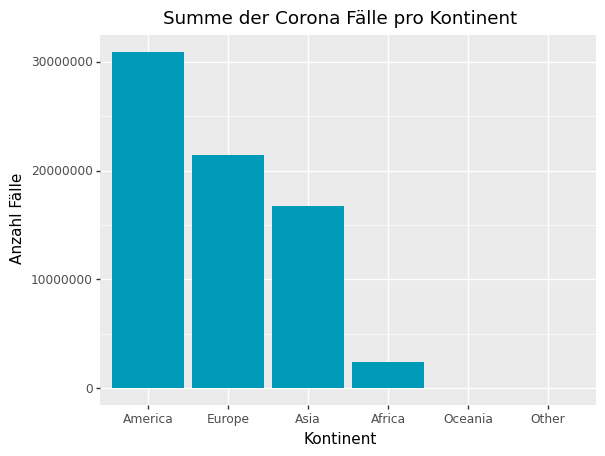

<ggplot: (169675234536)>

In [5]:

(plotnine.ggplot(sum_cases, plotnine.aes(x="continent", y="cases"))
 + plotnine.geom_bar(stat="identity")
 + plotnine.geom_col(fill = "#009ab9")
 + plotnine.scale_x_discrete(limits=("America", "Europe", "Asia", "Africa", "Oceania", "Other"))
 + plotnine.scale_fill_manual(values=['red', 'orange', 'yellow', 'green', 'blue'])
 + plotnine.ylab("Anzahl Fälle")
 + plotnine.xlab("Kontinent")
 + plotnine.labs(title = "Summe der Corona Fälle pro Kontinent")
)

# Covid Kartendaten visualisieren

In [6]:
df.head(5)

,date,day,month,year,cases,deaths,country,code,population,continent,cum2w100k
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,38041757.0,Asia,6.968658


In [7]:

import folium
import os
# Wir bilden einen neuen DataFrame aus den geladenen Daten.
# Dieser enthält die Spalten "country", "code" und "population" 
# sowie die Summe der Todesfälle für jedes Land.
daten_karte = df.groupby(["country", "code", "population"])["cases"].sum()
# Wir erzeugen eine separate Index-Spalte...
daten_karte = daten_karte.reset_index()
# ...und löschen die letzte Zeile
daten_karte = daten_karte[:-1]
# Hier wandeln wir die Werte in den Spalten "deaths" und "population" in Zahlen um
daten_karte["cases"] = pd.to_numeric(daten_karte["cases"])
daten_karte["population"] = pd.to_numeric(daten_karte["population"])
# Wir berechnen die Zahl der Todesfälle pro 100,000 Einwohner.
# Das Ergebnis wird in der Spalte "deaths100k" gespeichert.
daten_karte["cases100k"] = round(daten_karte["cases"] / (daten_karte["population"] / 100000))

daten_karte.head(5)

,country,code,population,cases,cases100k
0,Afghanistan,AF,38041757.0,49273,130.0
1,Albania,AL,2862427.0,48530,1695.0
2,Algeria,DZ,43053054.0,92102,214.0
3,Andorra,AD,76177.0,7338,9633.0
4,Angola,AO,31825299.0,16188,51.0


#### Visualisierung der Verteilung

[(0.0, 12041.9747490314)]

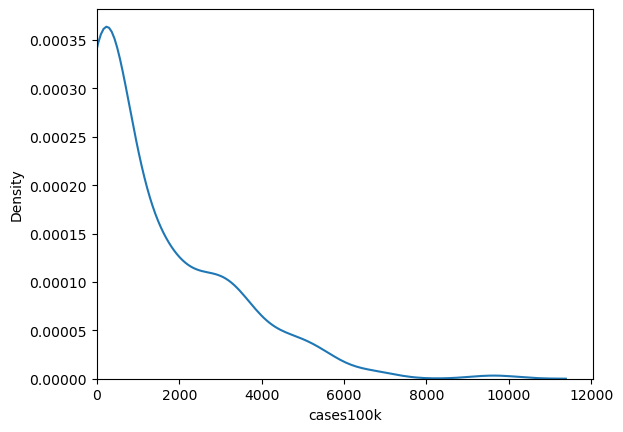

In [8]:
import seaborn as sns

# Wir wollen uns hier die Verteilung anschauen
g = sns.kdeplot(daten_karte['cases100k'])
g.set(xlim=(0, None))

In [9]:
daten_karte["cases100k"].mean()

1416.9715639810427

In [10]:
daten_karte["cases100k"].median()

663.0

#### Kartendarstellung mithilfe von iso_a2 JSON Datei

In [16]:
welt_geo = os.path.join("worldmap.json")

m = folium.Map(location=[0, 23], zoom_start=2)

folium.Choropleth(
    geo_data=welt_geo,
    data=daten_karte, 
    columns=["code", "cases100k"],
    key_on="feature.properties.iso_a2",
    fill_color='YlOrRd',
    fill_opacity=.6,          # Farben sollen etwas durchsichtig sein, damit man die Ländernamen lesen kann
    line_opacity=0.2,
    legend_name='Fälle pro 100,000 Einwohner',
    #threshold_scale=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000],         # automatische Skala ist genug
    nan_fill_color="#ced1cf",
    nan_fill_opacity=1    # Hier werden die Namen der fehlenden Werte mithilfe der opacity aufgedeckt damit sie die Aufmerksamkeit nicht lenken 
).add_to(m)

m

### Visualisierung der Anzahl an neue Fälle & Tode am 01.12.2020 in den bevölkerungsreichsten Länder Europas

In [12]:
Europ = df[(df["continent"] == "Europe") & (df["date"] == '2020-12-01')]
Europ.head(3)

,date,day,month,year,cases,deaths,country,code,population,continent,cum2w100k
353,2020-12-01,1,12,2020,557,12,Albania,AL,2862427.0,Europe,340.620040
979,2020-12-01,1,12,2020,33,0,Andorra,AD,76177.0,Europe,1090.880449
2339,2020-12-01,1,12,2020,843,29,Armenia,AM,2957728.0,Europe,578.045040


In [13]:
queue = pd.DataFrame(Europ.sort_values(by = "population", ascending = False)[["country","cases","deaths"]].head(10))
#queue

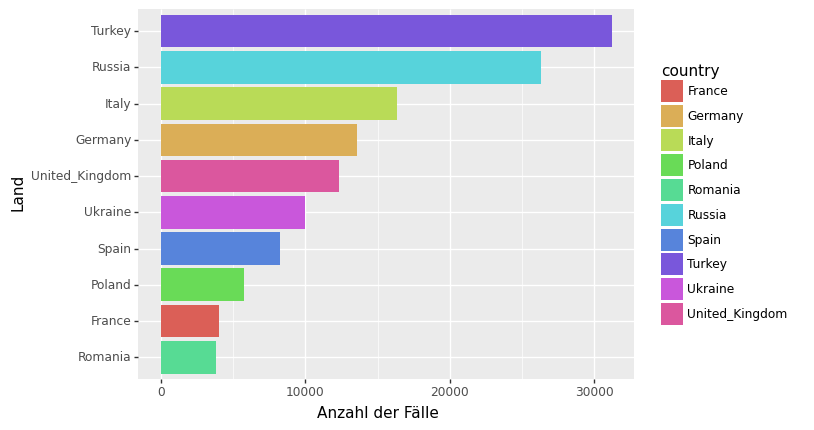

<ggplot: (169677268712)>

In [14]:
(plotnine.ggplot(queue, aes(x ="reorder(country, cases)", y ="cases", fill = "country"))
+ plotnine.geom_bar(stat="identity")
+ plotnine.coord_flip()
+ plotnine.xlab("Land")
+ plotnine.ylab("Anzahl der Fälle")
)
#(plotnine.ggplot(queue, aes(x = "country", y ="deaths", fill = "country"))  #geht leider nicht in der gleichen Abbildung
#+ plotnine.geom_bar(stat="identity")
#)

#### Plotnine macht es schwer, mehrere Variabeln im gleichen Plot / überlappende Plots zu zeichnen, deswegen machen wir es über die normale Plot Funktion von python 

<AxesSubplot:title={'center':'Anzahl der Fälle am 01.12.2020'}, xlabel='country'>

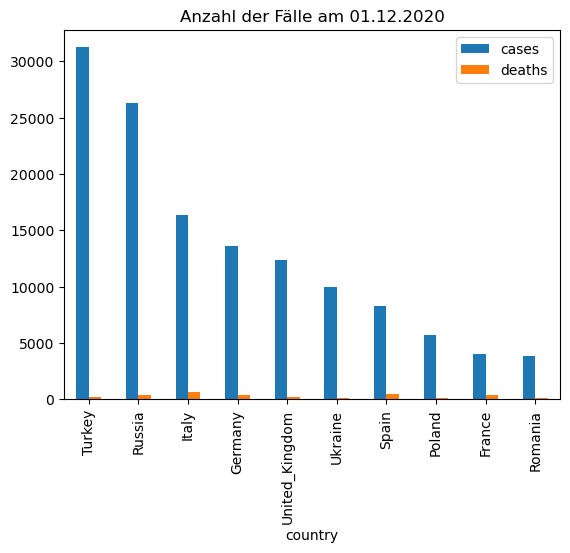

In [15]:
queue.sort_values("cases", ascending=False)
queue[["country","cases","deaths"]].set_index("country")
queue.sort_values(by = "cases", ascending = False).plot(x = "country", kind = "bar", title = "Anzahl der Fälle am 01.12.2020")